In [1]:
# load the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
train_data_path=r"C:\Users\CHAYAN GHOSH\OneDrive\Desktop\house price prediction project\data\train (1).csv"
df=pd.read_csv(train_data_path)

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
df.shape

(1460, 81)

In [8]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
## check int columns

int_features = df.select_dtypes(include=["int64"]).columns
print(int_features.shape[0])
print(int_features)

35
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [10]:
##check flot columns

float_features = df.select_dtypes(include=["float64"]).columns
print(float_features.shape[0])
print(float_features)

3
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [11]:
## check object columns

cat_features = df.select_dtypes(include=["object"]).columns
print(cat_features.shape[0])
print(cat_features)

43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [12]:
##  statistical information of numerical data
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df.describe().shape


(8, 38)

<Axes: >

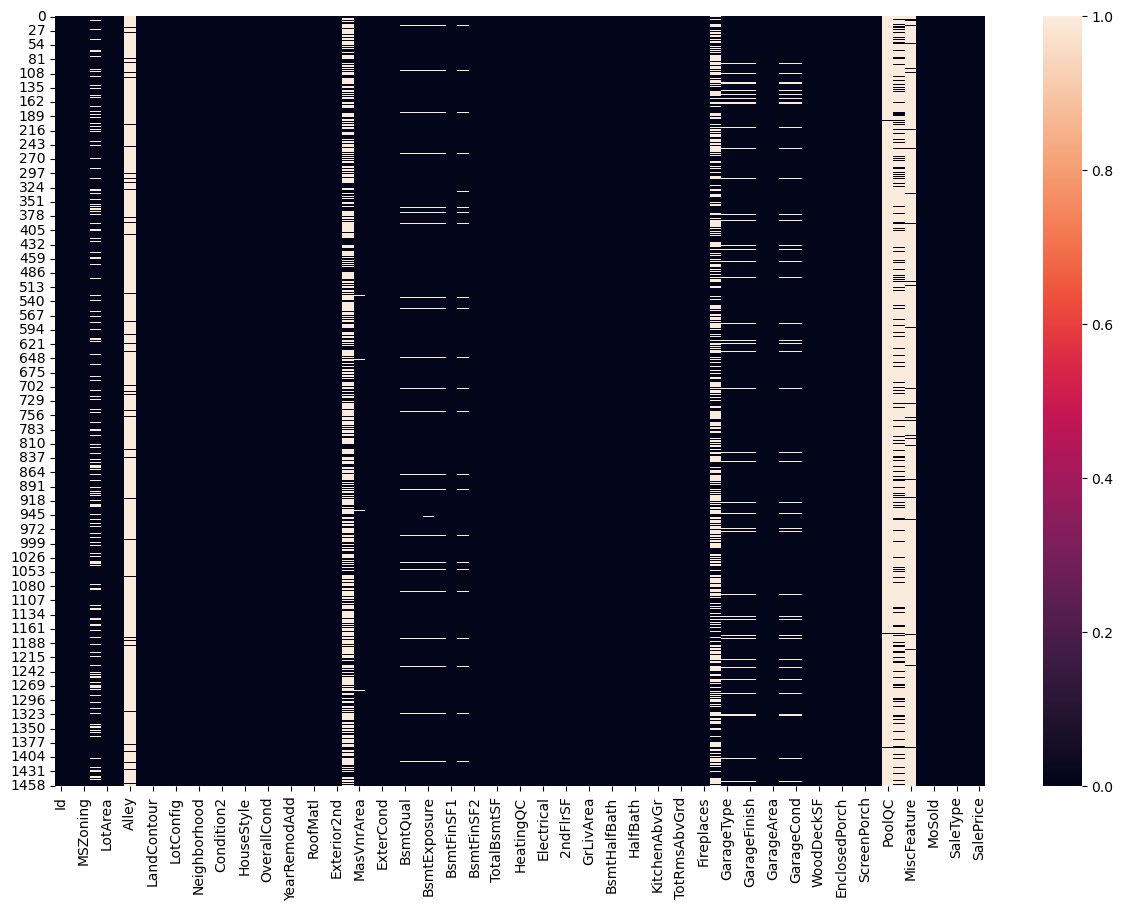

In [14]:

plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull())

In [15]:
##  % of missing value
null_count=df.isnull().sum()
null_count

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
null_per=df.isnull().sum()/df.shape[0]*100
null_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [17]:
miss_50_persentage=null_per[null_per>50]
miss_50_persentage

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [18]:
miss_50_20=null_per[(null_per>20) & (null_per<50)]
miss_50_20

FireplaceQu    47.260274
dtype: float64

In [19]:
miss_5_20=null_per[(null_per>5)&(null_per<20)]
miss_5_20

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [20]:
miss_0_5=null_per[(null_per>0)&(null_per<5)]
miss_0_5

MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
dtype: float64

In [21]:
missing_value_fea=null_per[null_per>0]
print("total missing value=",len(missing_value_fea))

total missing value= 19


In [22]:
missing_value_fea

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [23]:
catagorical_fea=missing_value_fea[missing_value_fea.keys().isin(cat_features)]
len(catagorical_fea)

16

In [24]:
catagorical_fea

Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [25]:
integer_fea=missing_value_fea[missing_value_fea.keys().isin(int_features)]
len(integer_fea)

0

In [26]:
float_fea=missing_value_fea[missing_value_fea.keys().isin(float_features)]
len(float_fea)

3

In [27]:
float_fea

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [28]:
## LotFrontage impuation
df["LotFrontage"].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


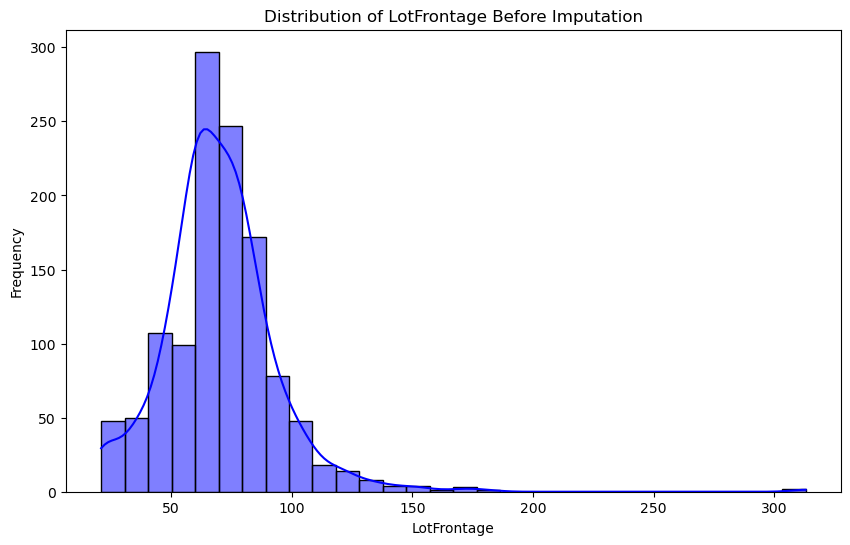

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df["LotFrontage"], kde=True, bins=30, color='blue')
plt.title("Distribution of LotFrontage Before Imputation")
plt.xlabel("LotFrontage")
plt.ylabel("Frequency")
plt.show()

In [30]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())
print(df["LotFrontage"].isnull().sum())  # Should print 0 if all NaN values are replaced



0


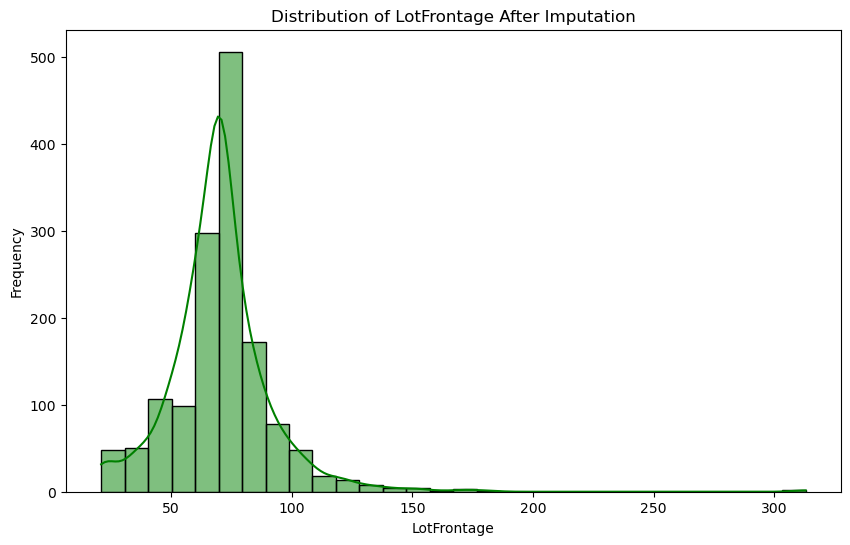

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df["LotFrontage"], kde=True, bins=30, color='green')
plt.title("Distribution of LotFrontage After Imputation")
plt.xlabel("LotFrontage")
plt.ylabel("Frequency")
plt.show()

In [32]:
# df["MasVnrArea"].value_counts()

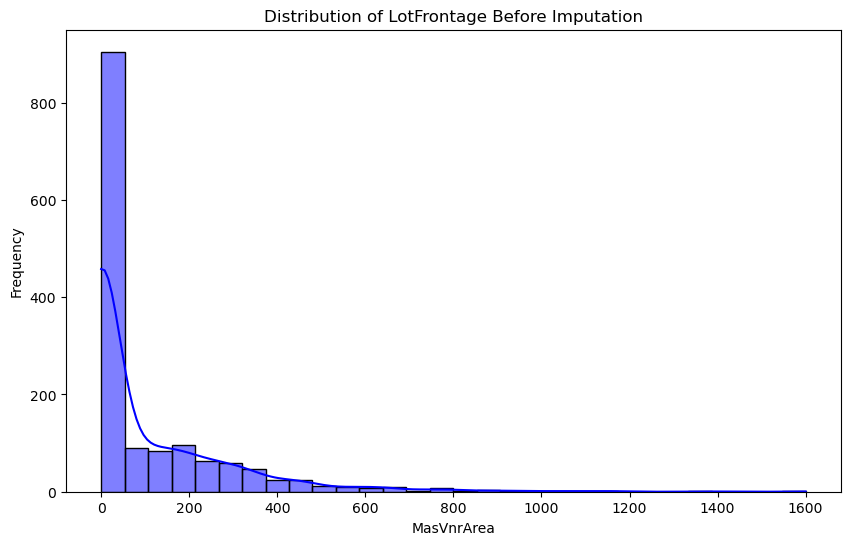

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df["MasVnrArea"], kde=True, bins=30, color='blue')
plt.title("Distribution of LotFrontage Before Imputation")
plt.xlabel("MasVnrArea")
plt.ylabel("Frequency")
plt.show()

In [34]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df["MasVnrArea"].isnull().sum()

0

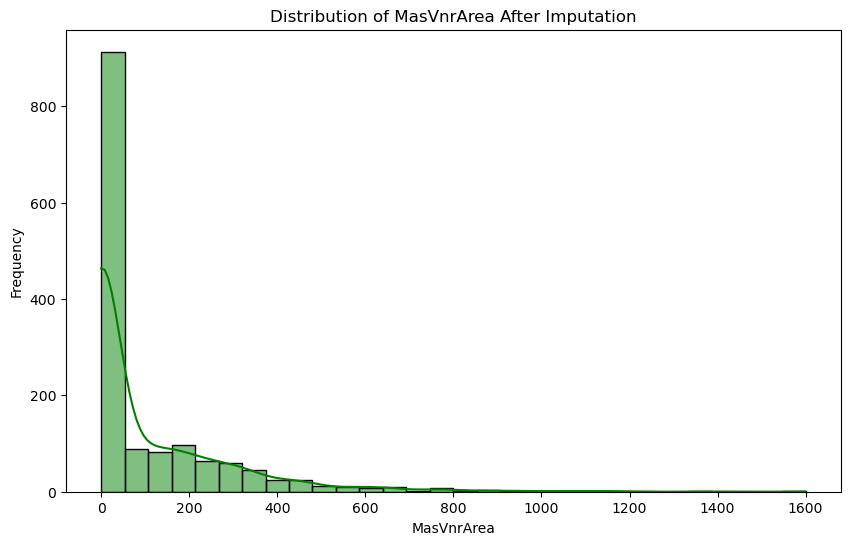

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df["MasVnrArea"], kde=True, bins=30, color='green')
plt.title("Distribution of MasVnrArea After Imputation")
plt.xlabel("MasVnrArea")
plt.ylabel("Frequency")
plt.show()

In [108]:
df["GarageYrBlt"].value_counts()

GarageYrBlt
2005.0    146
2006.0     59
2004.0     53
2003.0     50
2007.0     49
1977.0     35
1998.0     31
1999.0     30
1976.0     29
2008.0     29
2000.0     27
1968.0     26
2002.0     26
1950.0     24
1993.0     22
1958.0     21
1966.0     21
2009.0     21
1962.0     21
1965.0     21
1970.0     20
1996.0     20
1957.0     20
2001.0     20
1978.0     19
1954.0     19
1960.0     19
1997.0     19
1974.0     18
1964.0     18
1994.0     18
1995.0     18
1959.0     17
1956.0     16
1963.0     16
1990.0     16
1980.0     15
1979.0     15
1969.0     15
1967.0     15
1973.0     14
1988.0     14
1920.0     14
1972.0     14
1940.0     14
1992.0     13
1961.0     13
1971.0     13
1955.0     13
1953.0     12
1948.0     11
1987.0     11
1925.0     10
1985.0     10
1981.0     10
1989.0     10
1941.0     10
1975.0      9
1991.0      9
1939.0      9
1930.0      8
1984.0      8
1949.0      8
1983.0      7
1926.0      6
1986.0      6
1951.0      6
1936.0      5
1916.0      5
1922.0      5
1935.0  

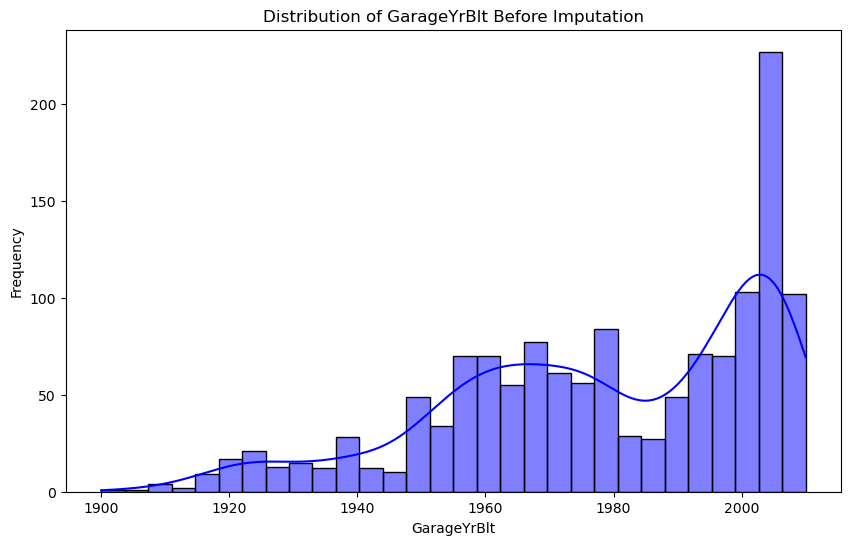

In [37]:
##GarageYrBlt
plt.figure(figsize=(10, 6))
sns.histplot(df["GarageYrBlt"], kde=True, bins=30, color='blue')
plt.title("Distribution of GarageYrBlt Before Imputation")
plt.xlabel("GarageYrBlt")
plt.ylabel("Frequency")
plt.show()



In [38]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0])
df["GarageYrBlt"].isnull().sum()

0

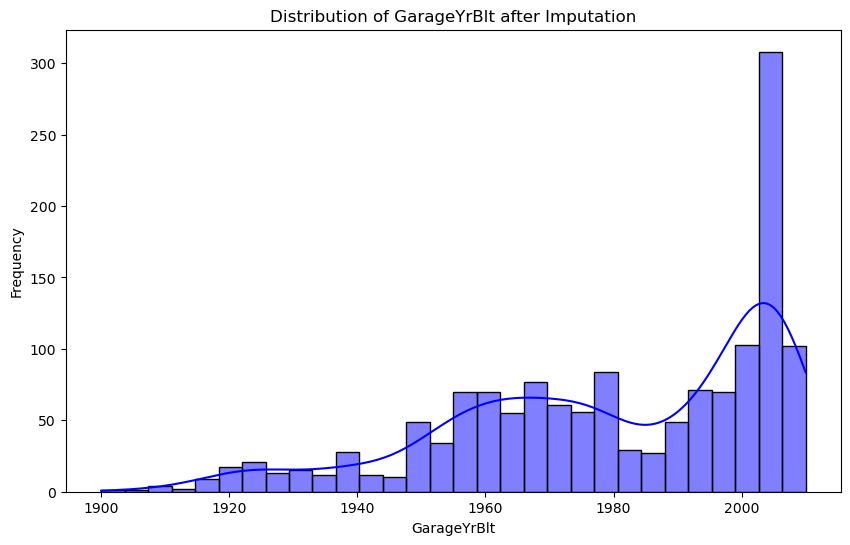

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df["GarageYrBlt"], kde=True, bins=30, color='blue')
plt.title("Distribution of GarageYrBlt after Imputation")
plt.xlabel("GarageYrBlt")
plt.ylabel("Frequency")
plt.show()

In [40]:
##   Alley

df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

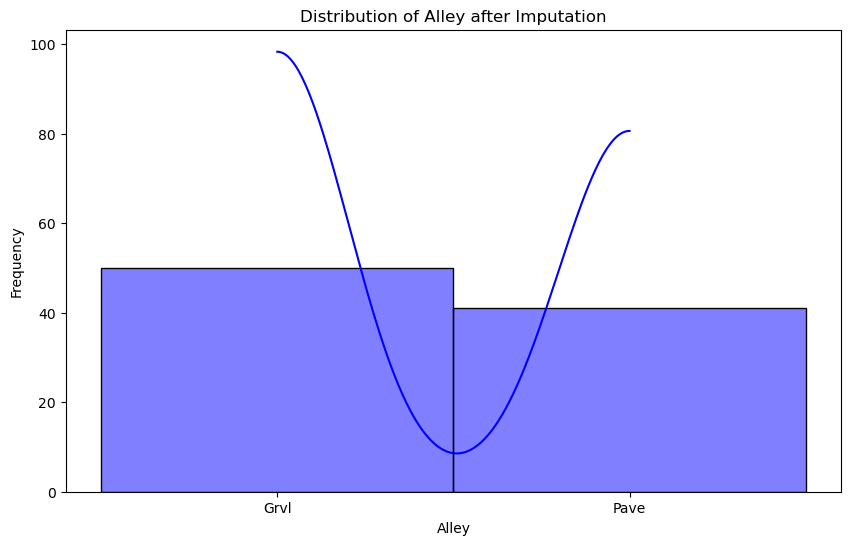

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Alley"], kde=True, bins=30, color='blue')
plt.title("Distribution of Alley after Imputation")
plt.xlabel("Alley")
plt.ylabel("Frequency")
plt.show()

In [42]:
alley_count="NA"
df["Alley"].replace(np.nan,alley_count,inplace=True )



##df["Alley"] = df["Alley"].fillna(df["Alley"].mode()[0])
df["Alley"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\2547117313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Alley"].replace(np.nan,alley_count,inplace=True )


0

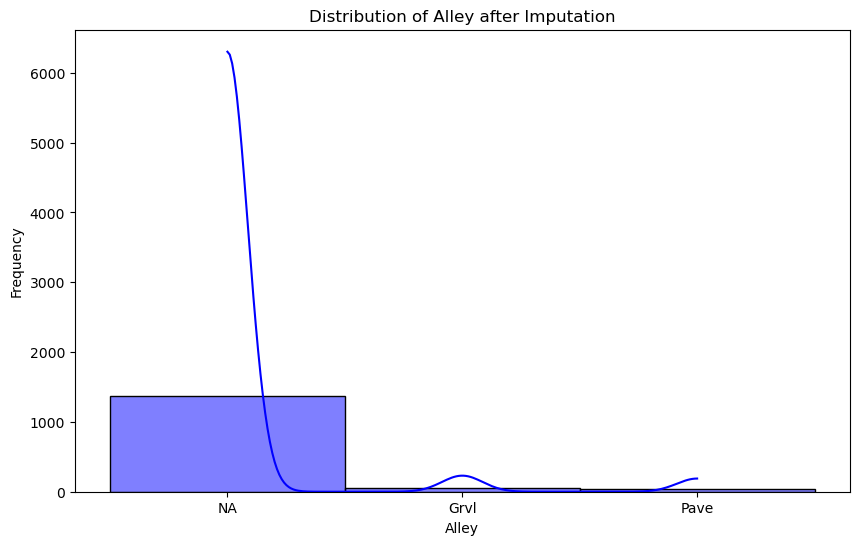

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Alley"], kde=True, bins=30, color='blue')
plt.title("Distribution of Alley after Imputation")
plt.xlabel("Alley")
plt.ylabel("Frequency")
plt.show()

In [44]:
##MasVnrType
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

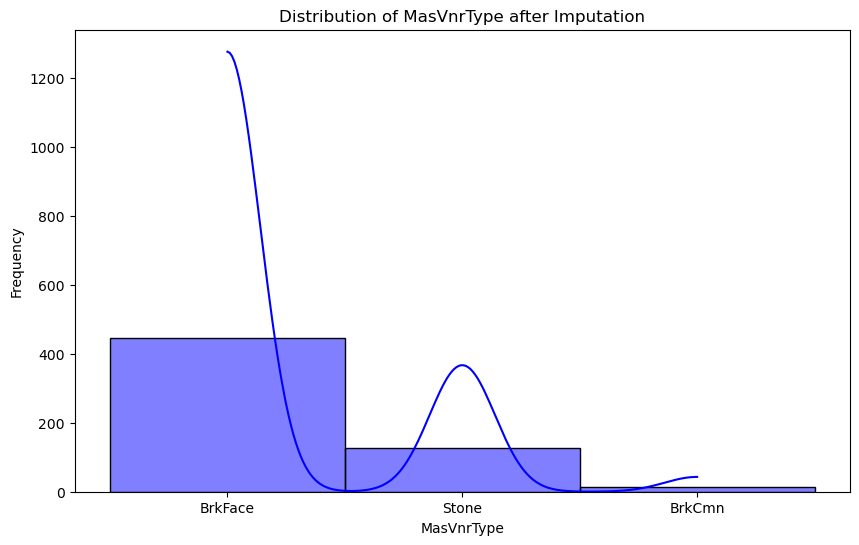

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df["MasVnrType"], kde=True, bins=30, color='blue')
plt.title("Distribution of MasVnrType after Imputation")
plt.xlabel("MasVnrType")
plt.ylabel("Frequency")
plt.show()

In [46]:
MasVnrType_count="NA"
df["MasVnrType"].replace(np.nan,MasVnrType_count,inplace=True )



##df["Alley"] = df["Alley"].fillna(df["Alley"].mode()[0])
df["MasVnrType"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\620551940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MasVnrType"].replace(np.nan,MasVnrType_count,inplace=True )


0

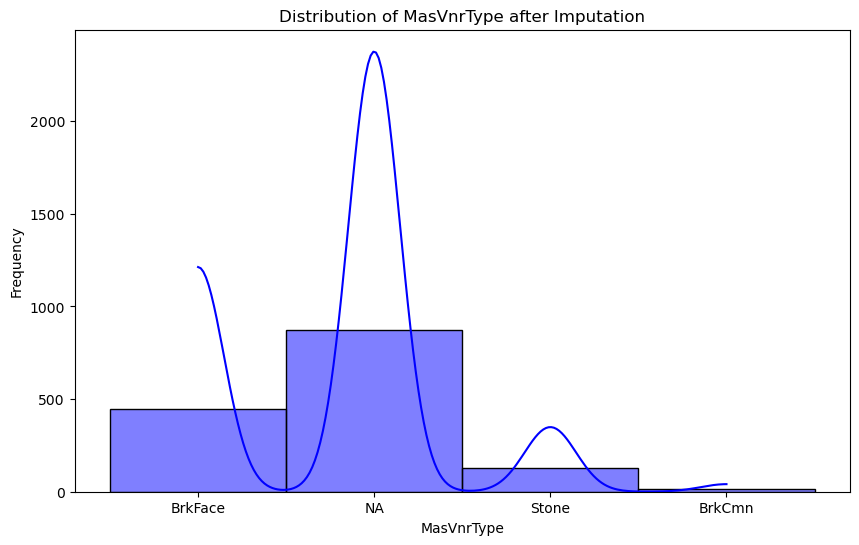

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df["MasVnrType"], kde=True, bins=30, color='blue')
plt.title("Distribution of MasVnrType after Imputation")
plt.xlabel("MasVnrType")
plt.ylabel("Frequency")
plt.show()

In [48]:
## BsmtQual
df["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

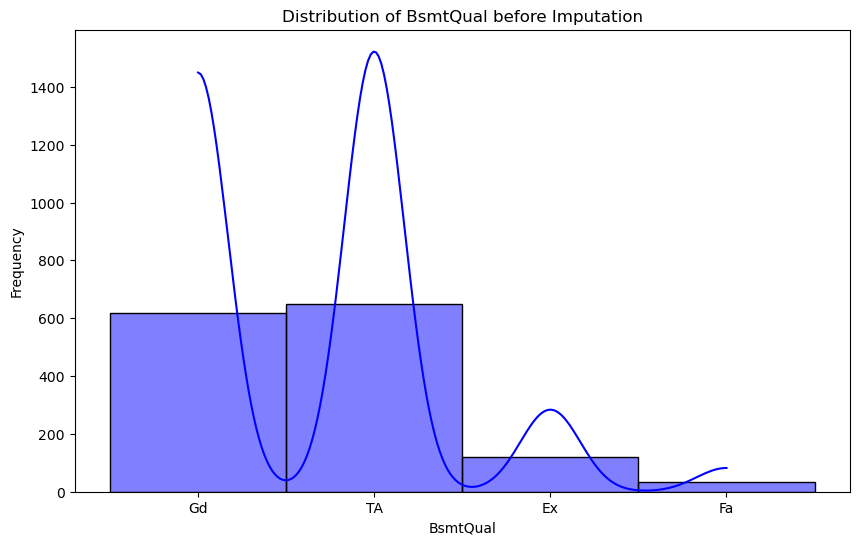

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtQual"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtQual before Imputation")
plt.xlabel("BsmtQual")
plt.ylabel("Frequency")
plt.show()

In [50]:
BsmtQual_count="NA"
df["BsmtQual"].replace(np.nan,BsmtQual_count,inplace=True )



##df["Alley"] = df["Alley"].fillna(df["Alley"].mode()[0])
df["BsmtQual"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\2818548363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BsmtQual"].replace(np.nan,BsmtQual_count,inplace=True )


0

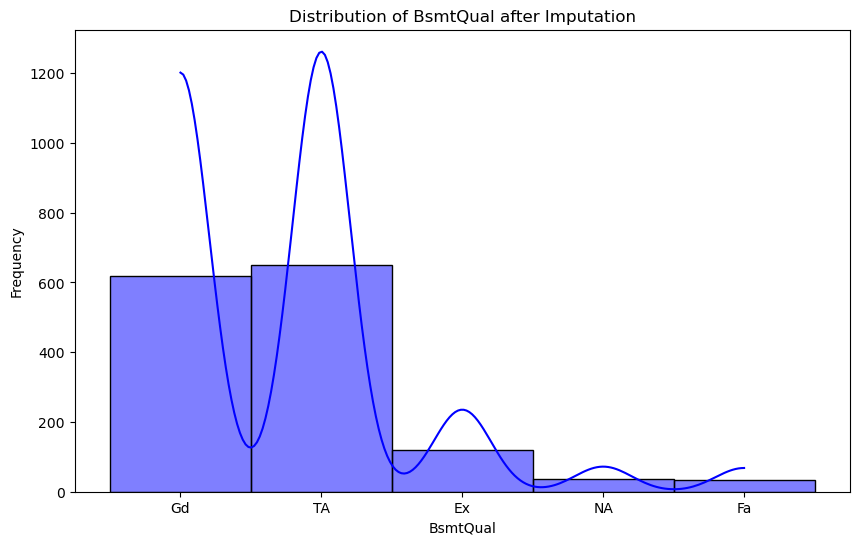

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtQual"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtQual after Imputation")
plt.xlabel("BsmtQual")
plt.ylabel("Frequency")
plt.show()

In [52]:
## BsmtCond
df["BsmtCond"].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

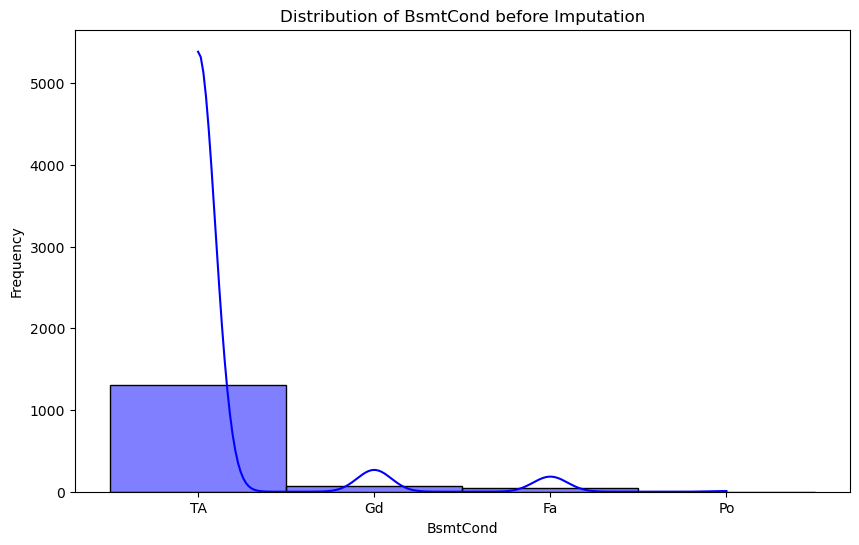

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtCond"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtCond before Imputation")
plt.xlabel("BsmtCond")
plt.ylabel("Frequency")
plt.show()

In [54]:
BsmtCond_count="NA"
df["BsmtCond"].replace(np.nan,BsmtCond_count,inplace=True )



##df["BsmtCond"] = df["Alley"].fillna(df["Alley"].mode()[0])
df["BsmtCond"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\593878537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BsmtCond"].replace(np.nan,BsmtCond_count,inplace=True )


0

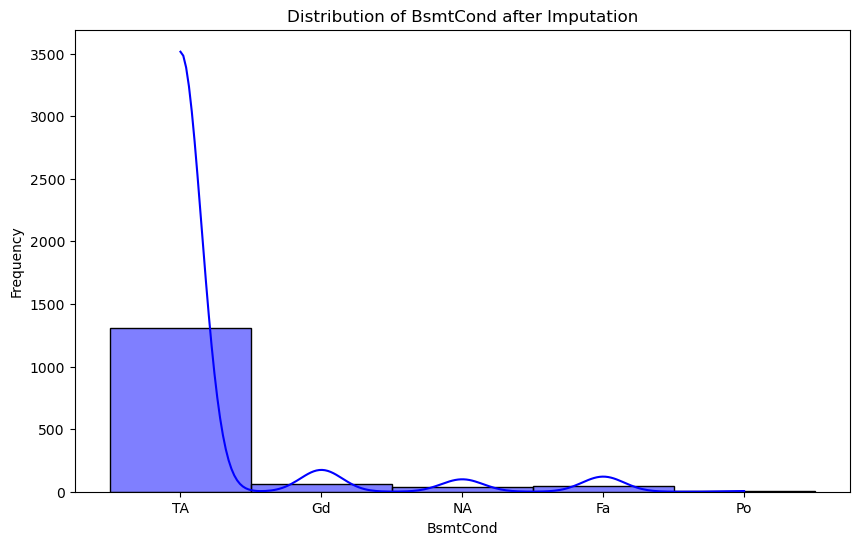

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtCond"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtCond after Imputation")
plt.xlabel("BsmtCond")
plt.ylabel("Frequency")
plt.show()

In [56]:
## BsmtExposure
df["BsmtExposure"].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

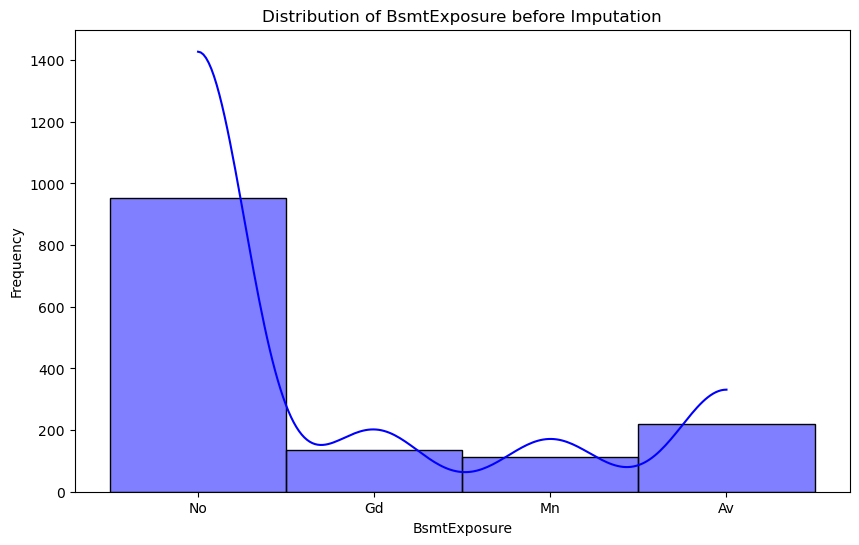

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtExposure"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtExposure before Imputation")
plt.xlabel("BsmtExposure")
plt.ylabel("Frequency")
plt.show()

In [58]:
BsmtExposure_count="NA"
df["BsmtExposure"].replace(np.nan,BsmtCond_count,inplace=True )



##df["BsmtCond"] = df["Alley"].fillna(df["Alley"].mode()[0])
df["BsmtExposure"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\3808225298.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BsmtExposure"].replace(np.nan,BsmtCond_count,inplace=True )


0

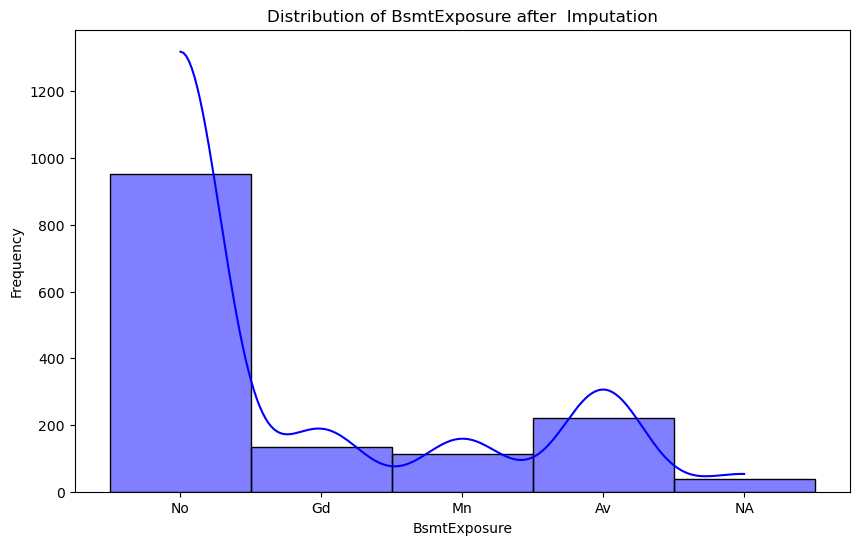

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtExposure"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtExposure after  Imputation")
plt.xlabel("BsmtExposure")
plt.ylabel("Frequency")
plt.show()

In [60]:
## BsmtFinType1
df["BsmtFinType1"].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

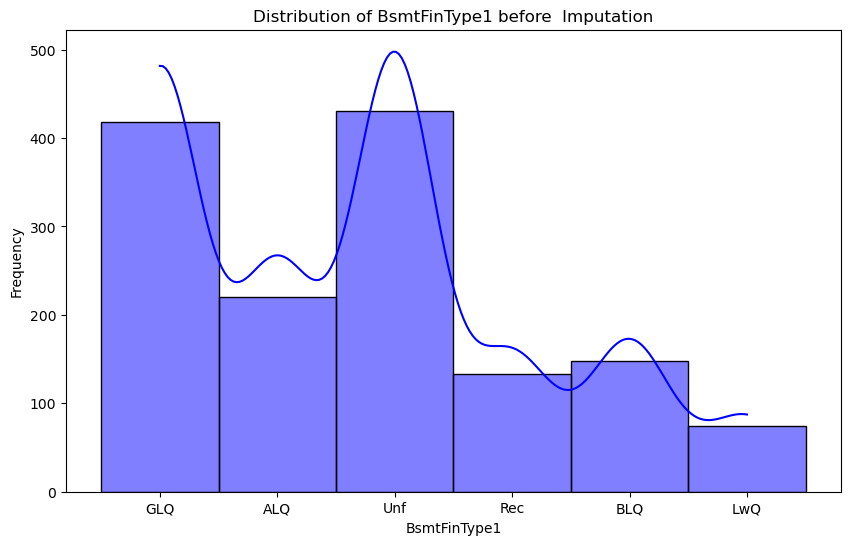

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtFinType1"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtFinType1 before  Imputation")
plt.xlabel("BsmtFinType1")
plt.ylabel("Frequency")
plt.show()

In [62]:
BsmtFinType1_count="NA"
df["BsmtFinType1"].replace(np.nan,BsmtCond_count,inplace=True )



##df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["BsmtFinType1"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\3629694513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BsmtFinType1"].replace(np.nan,BsmtCond_count,inplace=True )


0

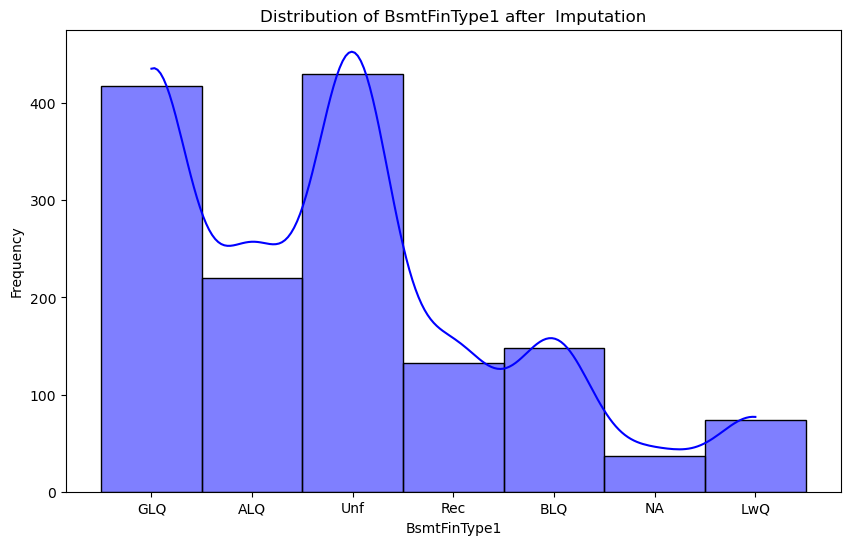

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtFinType1"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtFinType1 after  Imputation")
plt.xlabel("BsmtFinType1")
plt.ylabel("Frequency")
plt.show()

In [64]:
##  BsmtFinType2
df["BsmtFinType2"].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

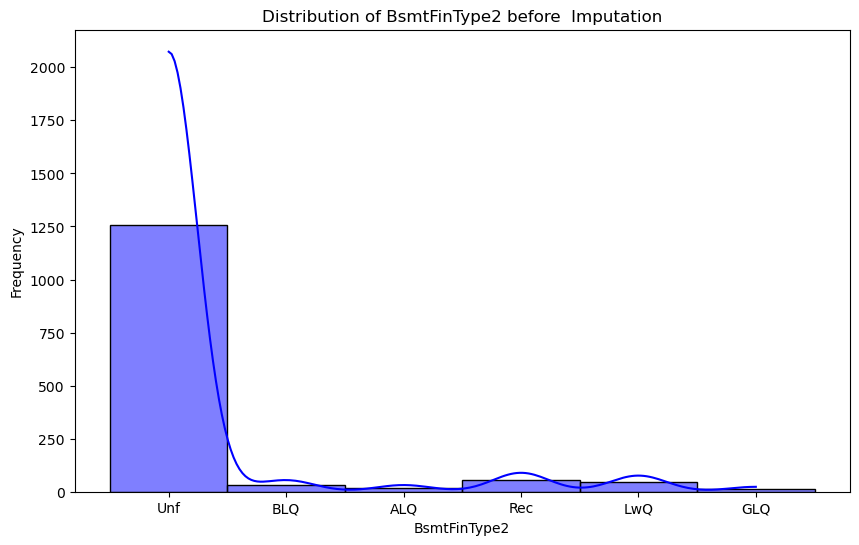

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtFinType2"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtFinType2 before  Imputation")
plt.xlabel("BsmtFinType2")
plt.ylabel("Frequency")
plt.show()

In [66]:
BsmtFinType2_count="NA"
df["BsmtFinType2"].replace(np.nan,BsmtCond_count,inplace=True )



##df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["BsmtFinType2"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\3267699916.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BsmtFinType2"].replace(np.nan,BsmtCond_count,inplace=True )


0

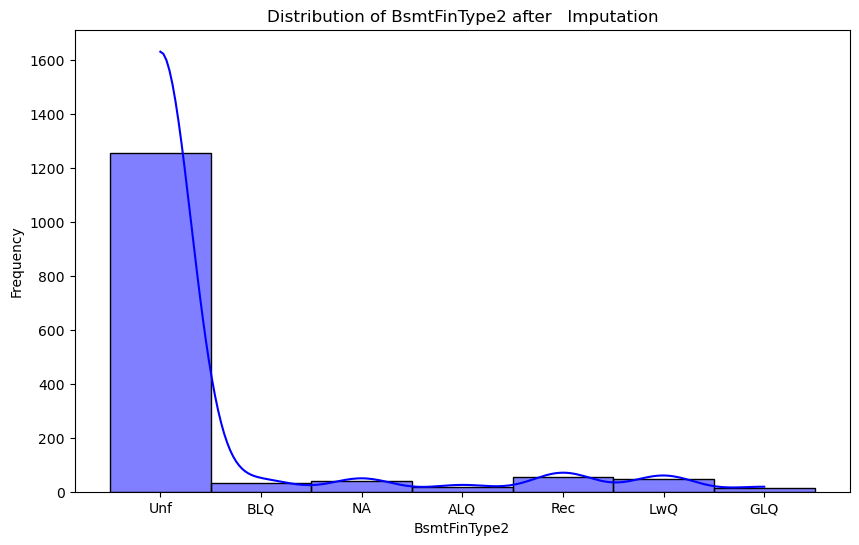

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BsmtFinType2"], kde=True, bins=30, color='blue')
plt.title("Distribution of BsmtFinType2 after   Imputation")
plt.xlabel("BsmtFinType2")
plt.ylabel("Frequency")
plt.show()

In [68]:
## Electrical
df["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


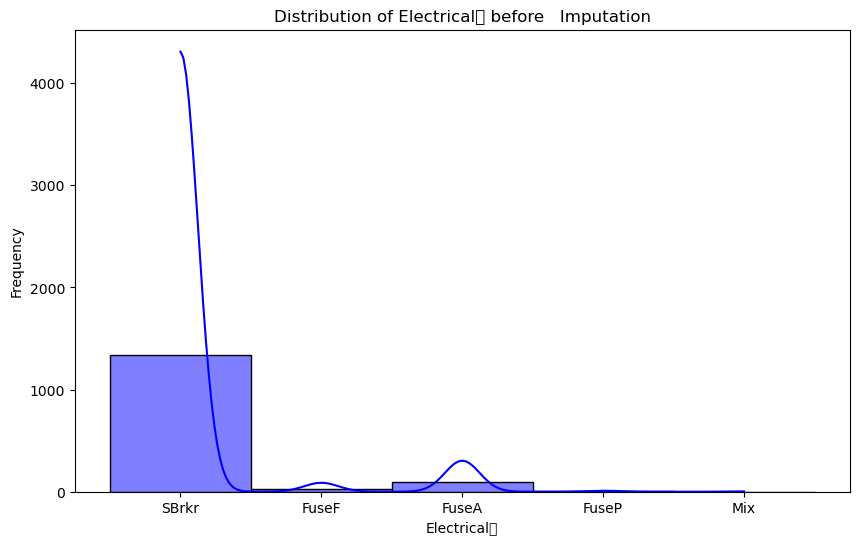

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Electrical"], kde=True, bins=30, color='blue')
plt.title("Distribution of Electrical	 before   Imputation")
plt.xlabel("Electrical	")
plt.ylabel("Frequency")
plt.show()

In [70]:
Electrical_count="NA"
df["Electrical"].replace(np.nan,BsmtCond_count,inplace=True )



##df["Electrical	"] = df["Electrical"].fillna(df["Electrical"].mode()[0])
df["Electrical"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\795491545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Electrical"].replace(np.nan,BsmtCond_count,inplace=True )


0

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


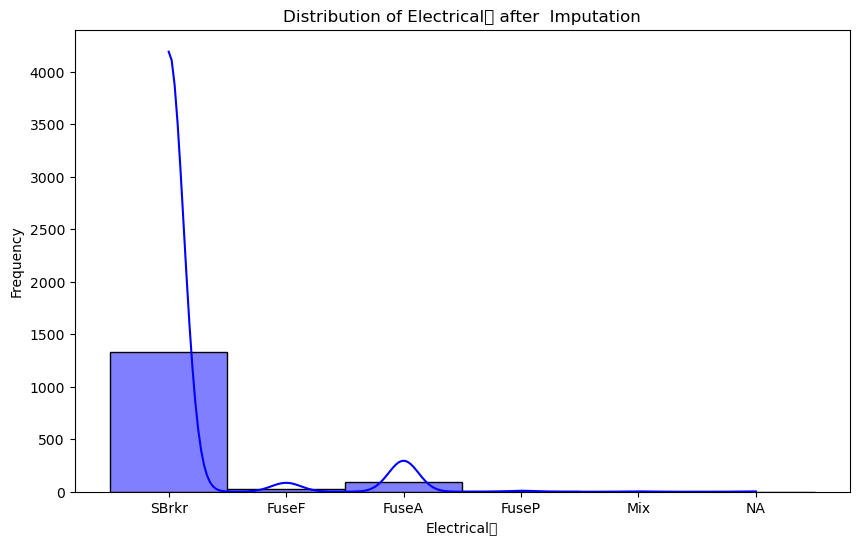

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Electrical"], kde=True, bins=30, color='blue')
plt.title("Distribution of Electrical	 after  Imputation")
plt.xlabel("Electrical	")
plt.ylabel("Frequency")
plt.show()

In [72]:
## FireplaceQu
df["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

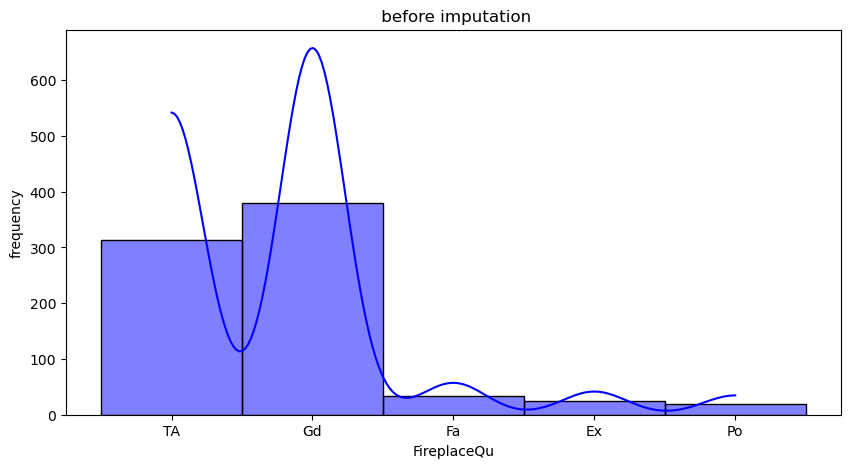

In [73]:
plt.figure(figsize=(10,5))
sns.histplot(df["FireplaceQu"], kde=True, bins=30, color='blue')
plt.title(" before imputation")
plt.xlabel("FireplaceQu")
plt.ylabel("frequency")
plt.show()



In [74]:
FireplaceQu_count="NA"
df["FireplaceQu"].replace(np.nan,BsmtCond_count,inplace=True )



##df["Electrical	"] = df["Electrical"].fillna(df["Electrical"].mode()[0])
df["FireplaceQu"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\3342211459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FireplaceQu"].replace(np.nan,BsmtCond_count,inplace=True )


0

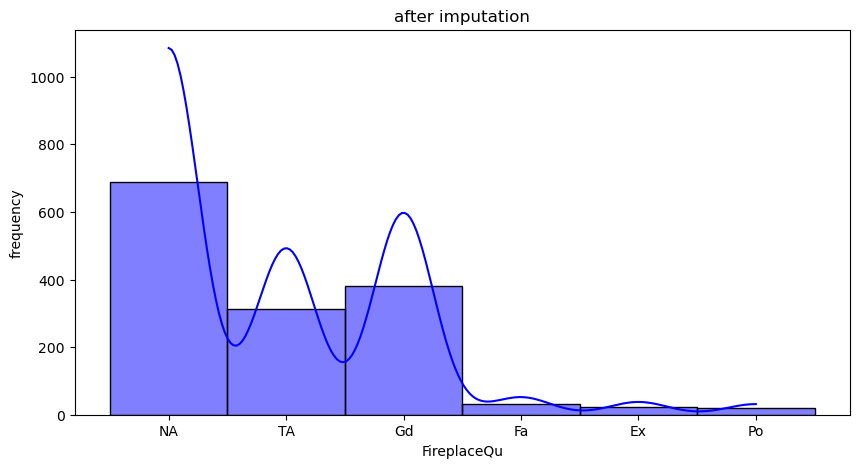

In [75]:
plt.figure(figsize=(10,5))
sns.histplot(df["FireplaceQu"], kde=True, bins=30, color='blue')
plt.title("after imputation")
plt.xlabel("FireplaceQu")
plt.ylabel("frequency")
plt.show()


In [76]:
##GarageType
df["GarageType"].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

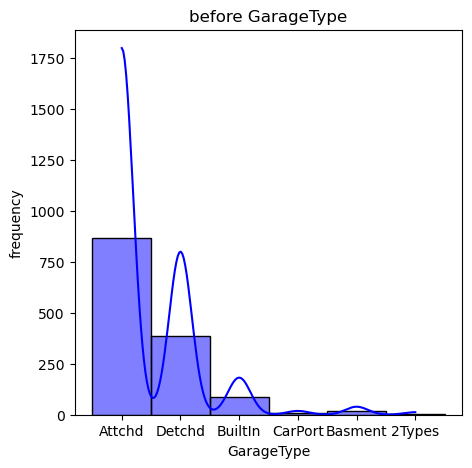

In [77]:
plt.figure(figsize=(5,5))
sns.histplot(df["GarageType"], kde=True, bins=20, color='blue')
plt.title("before GarageType")
plt.xlabel("GarageType")
plt.ylabel("frequency")
plt.show()

In [78]:
GarageType_count="NA"
df["GarageType"].replace(np.nan,BsmtCond_count,inplace=True )




df["GarageType"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\3026005631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GarageType"].replace(np.nan,BsmtCond_count,inplace=True )


0

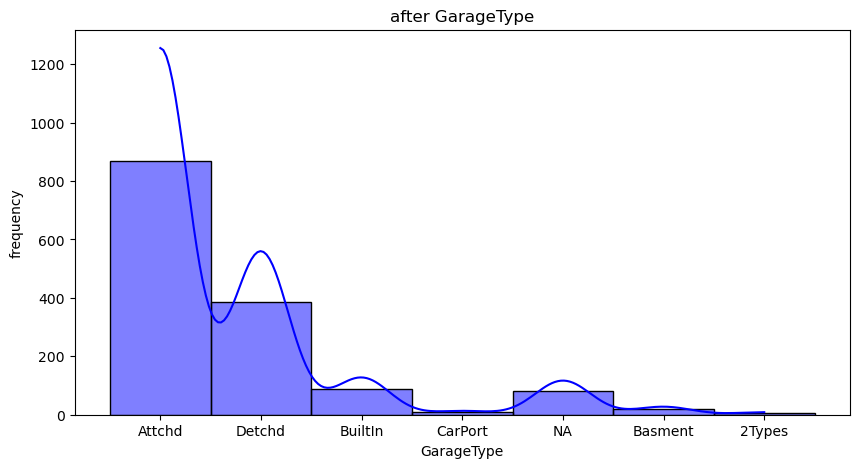

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(df["GarageType"], kde=True, bins=20, color='blue')
plt.title("after GarageType")
plt.xlabel("GarageType")
plt.ylabel("frequency")
plt.show()

In [80]:
## GarageYrBlt
# df["GarageYrBlt"].value_counts()

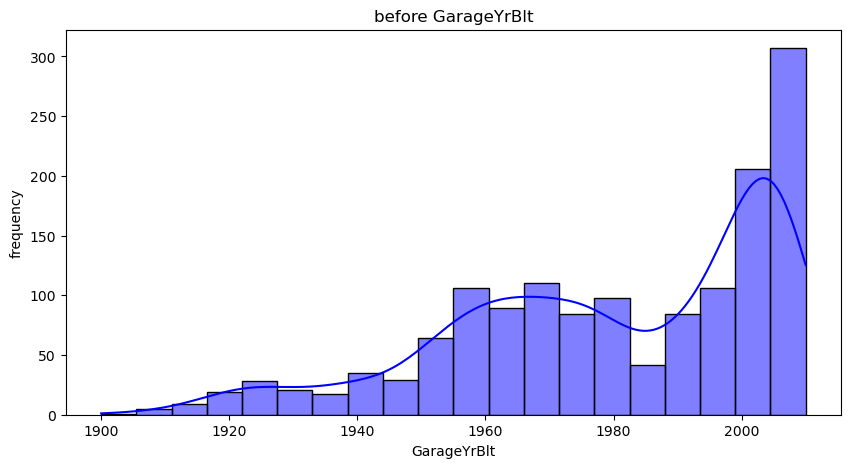

In [81]:
plt.figure(figsize=(10,5))
sns.histplot(df["GarageYrBlt"], kde=True, bins=20, color='blue')
plt.title("before GarageYrBlt")
plt.xlabel("GarageYrBlt")
plt.ylabel("frequency")
plt.show()

In [82]:

df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean())
df["GarageYrBlt"].isnull().sum()

0

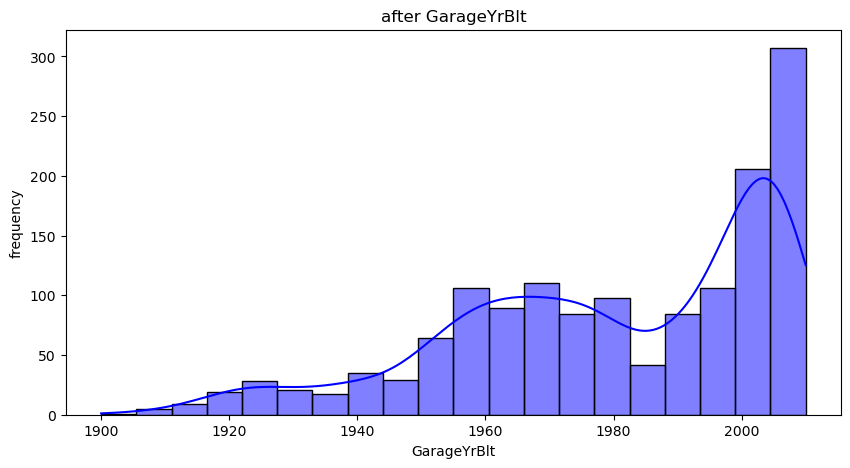

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(df["GarageYrBlt"], kde=True, bins=20, color='blue')
plt.title("after GarageYrBlt")
plt.xlabel("GarageYrBlt")
plt.ylabel("frequency")
plt.show()

In [84]:
## GarageFinish
df["GarageFinish"].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

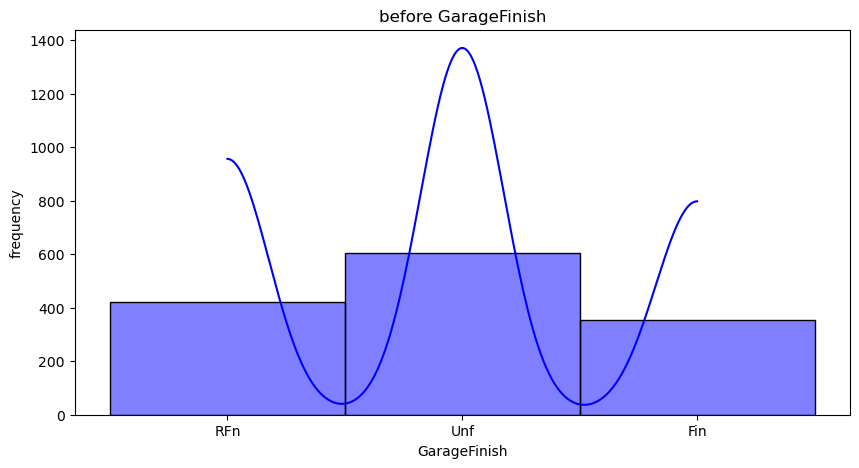

In [85]:
plt.figure(figsize=(10,5))
sns.histplot(df["GarageFinish"], kde=True, bins=20, color='blue')
plt.title("before GarageFinish")
plt.xlabel("GarageFinish")
plt.ylabel("frequency")
plt.show()

In [86]:
GarageType_count="NA"
df["GarageFinish"].replace(np.nan,BsmtCond_count,inplace=True )
df["GarageFinish"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\1549325394.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GarageFinish"].replace(np.nan,BsmtCond_count,inplace=True )


0

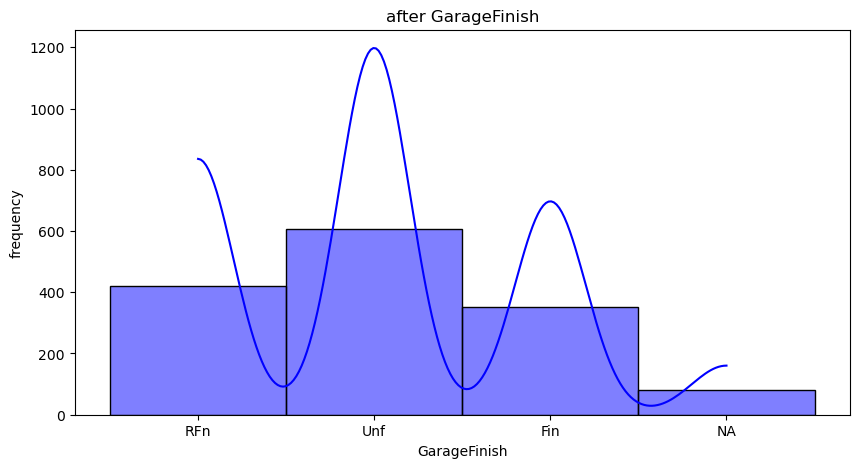

In [87]:
plt.figure(figsize=(10,5))
sns.histplot(df["GarageFinish"], kde=True, bins=20, color='blue')
plt.title("after GarageFinish")
plt.xlabel("GarageFinish")
plt.ylabel("frequency")
plt.show()

In [88]:
## GarageQual
df["GarageQual"].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

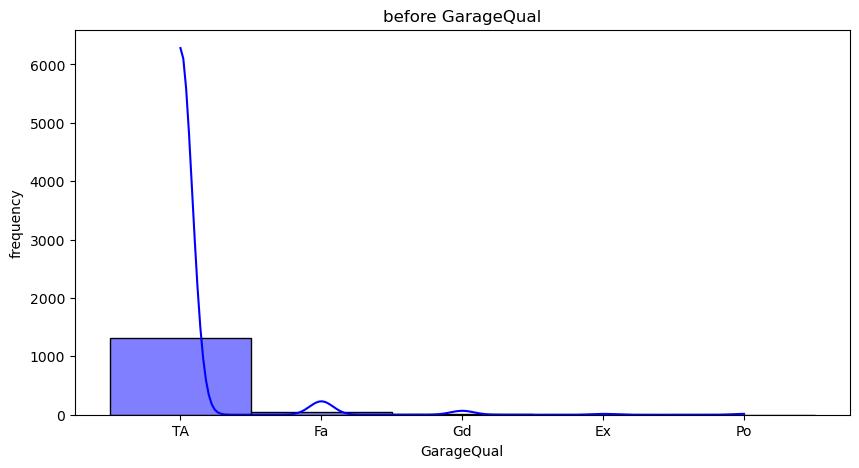

In [89]:
plt.figure(figsize=(10,5))
sns.histplot(df["GarageQual"], kde=True, bins=20, color='blue')
plt.title("before GarageQual")
plt.xlabel("GarageQual")
plt.ylabel("frequency")
plt.show()

In [90]:
GarageQual_count="NA"
df["GarageQual"].replace(np.nan,BsmtCond_count,inplace=True )
df["GarageQual"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\2723397300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GarageQual"].replace(np.nan,BsmtCond_count,inplace=True )


0

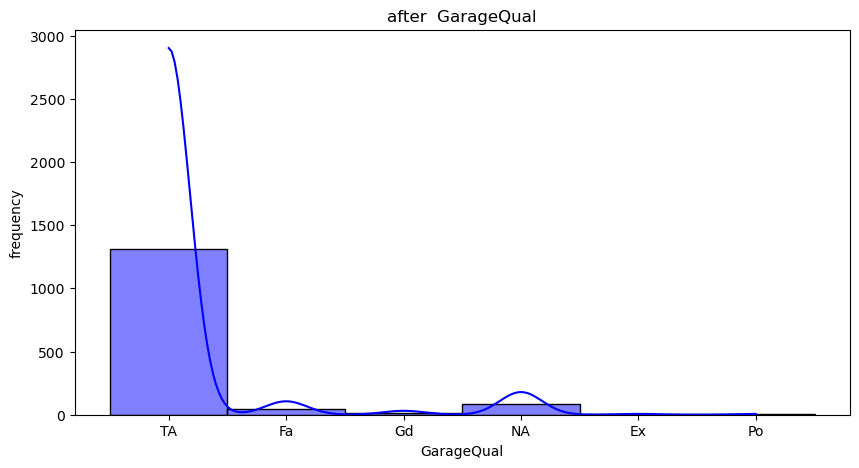

In [91]:
plt.figure(figsize=(10,5))
sns.histplot(df["GarageQual"], kde=True, bins=20, color='blue')
plt.title("after  GarageQual")
plt.xlabel("GarageQual")
plt.ylabel("frequency")
plt.show()

In [92]:
## GarageCond
df["GarageCond"].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

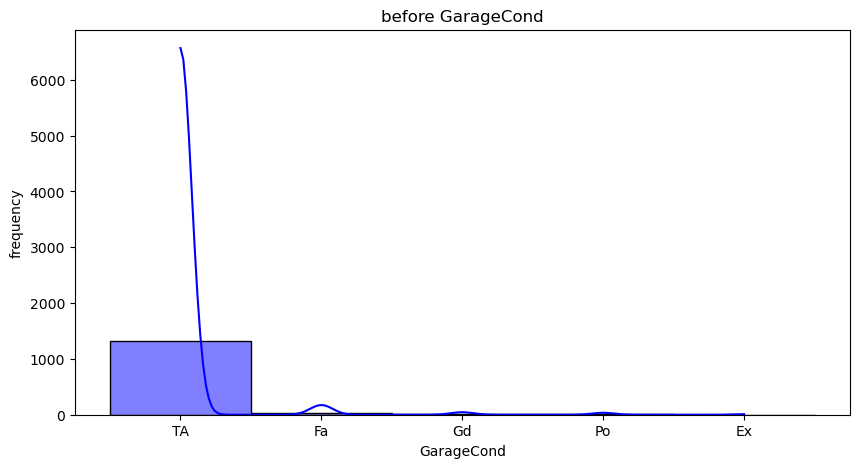

In [93]:
plt.figure(figsize=(10,5))
sns.histplot(df["GarageCond"], kde=True, bins=20, color='blue')
plt.title("before GarageCond")
plt.xlabel("GarageCond")
plt.ylabel("frequency")
plt.show()

In [94]:
GarageCond_count="NA"
df["GarageCond"].replace(np.nan,BsmtCond_count,inplace=True )
df["GarageCond"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\38897077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GarageCond"].replace(np.nan,BsmtCond_count,inplace=True )


0

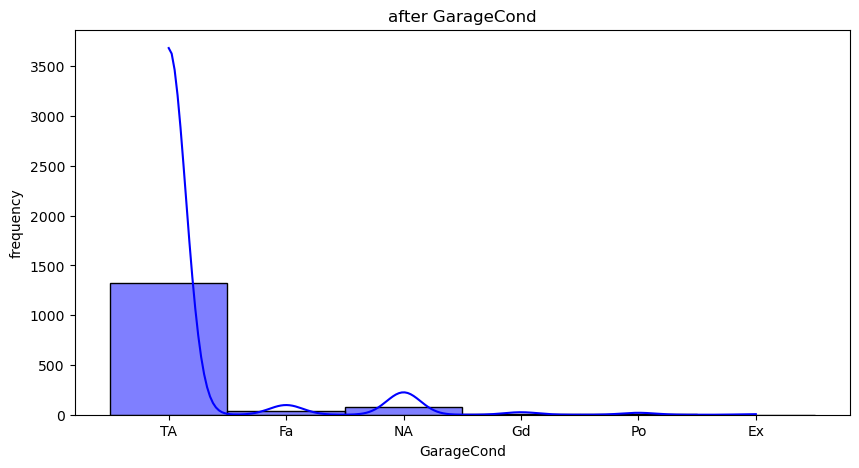

In [95]:
plt.figure(figsize=(10,5))
sns.histplot(df["GarageCond"], kde=True, bins=20, color='blue')
plt.title("after GarageCond")
plt.xlabel("GarageCond")
plt.ylabel("frequency")
plt.show()

In [96]:
##  PoolQC
PoolQC_count="NA"
df["PoolQC"].replace(np.nan,BsmtCond_count,inplace=True )
df["PoolQC"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\3344396817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PoolQC"].replace(np.nan,BsmtCond_count,inplace=True )


0

In [97]:
## Fence
Fence_count="NA"
df["Fence"].replace(np.nan,BsmtCond_count,inplace=True )
df["Fence"].isnull().sum()


C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\1525840642.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fence"].replace(np.nan,BsmtCond_count,inplace=True )


0

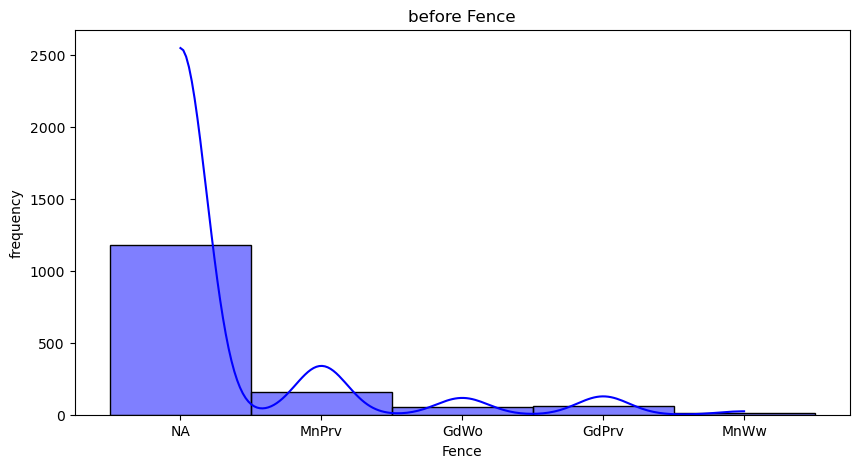

In [98]:
plt.figure(figsize=(10,5))
sns.histplot(df["Fence"], kde=True, bins=20, color='blue')
plt.title("before Fence")
plt.xlabel("Fence")
plt.ylabel("frequency")
plt.show()

In [99]:

Fence_count="NA"
df["Fence"].replace(np.nan,BsmtCond_count,inplace=True )
df["Fence"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\3467743834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fence"].replace(np.nan,BsmtCond_count,inplace=True )


0

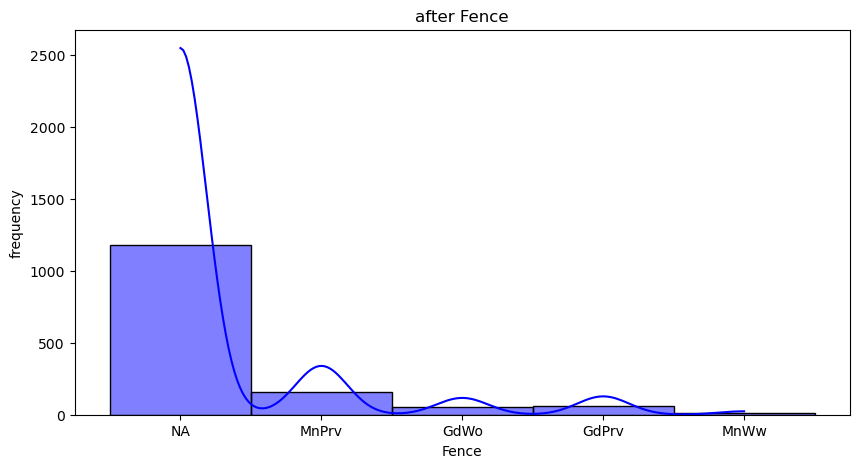

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(df["Fence"], kde=True, bins=20, color='blue')
plt.title("after Fence")
plt.xlabel("Fence")
plt.ylabel("frequency")
plt.show()

In [101]:
## ##  MiscFeature
MiscFeature_count="NA"
df["MiscFeature"].replace(np.nan,BsmtCond_count,inplace=True )
df["MiscFeature"].isnull().sum()


C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_16688\2149162972.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MiscFeature"].replace(np.nan,BsmtCond_count,inplace=True )


0

In [102]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

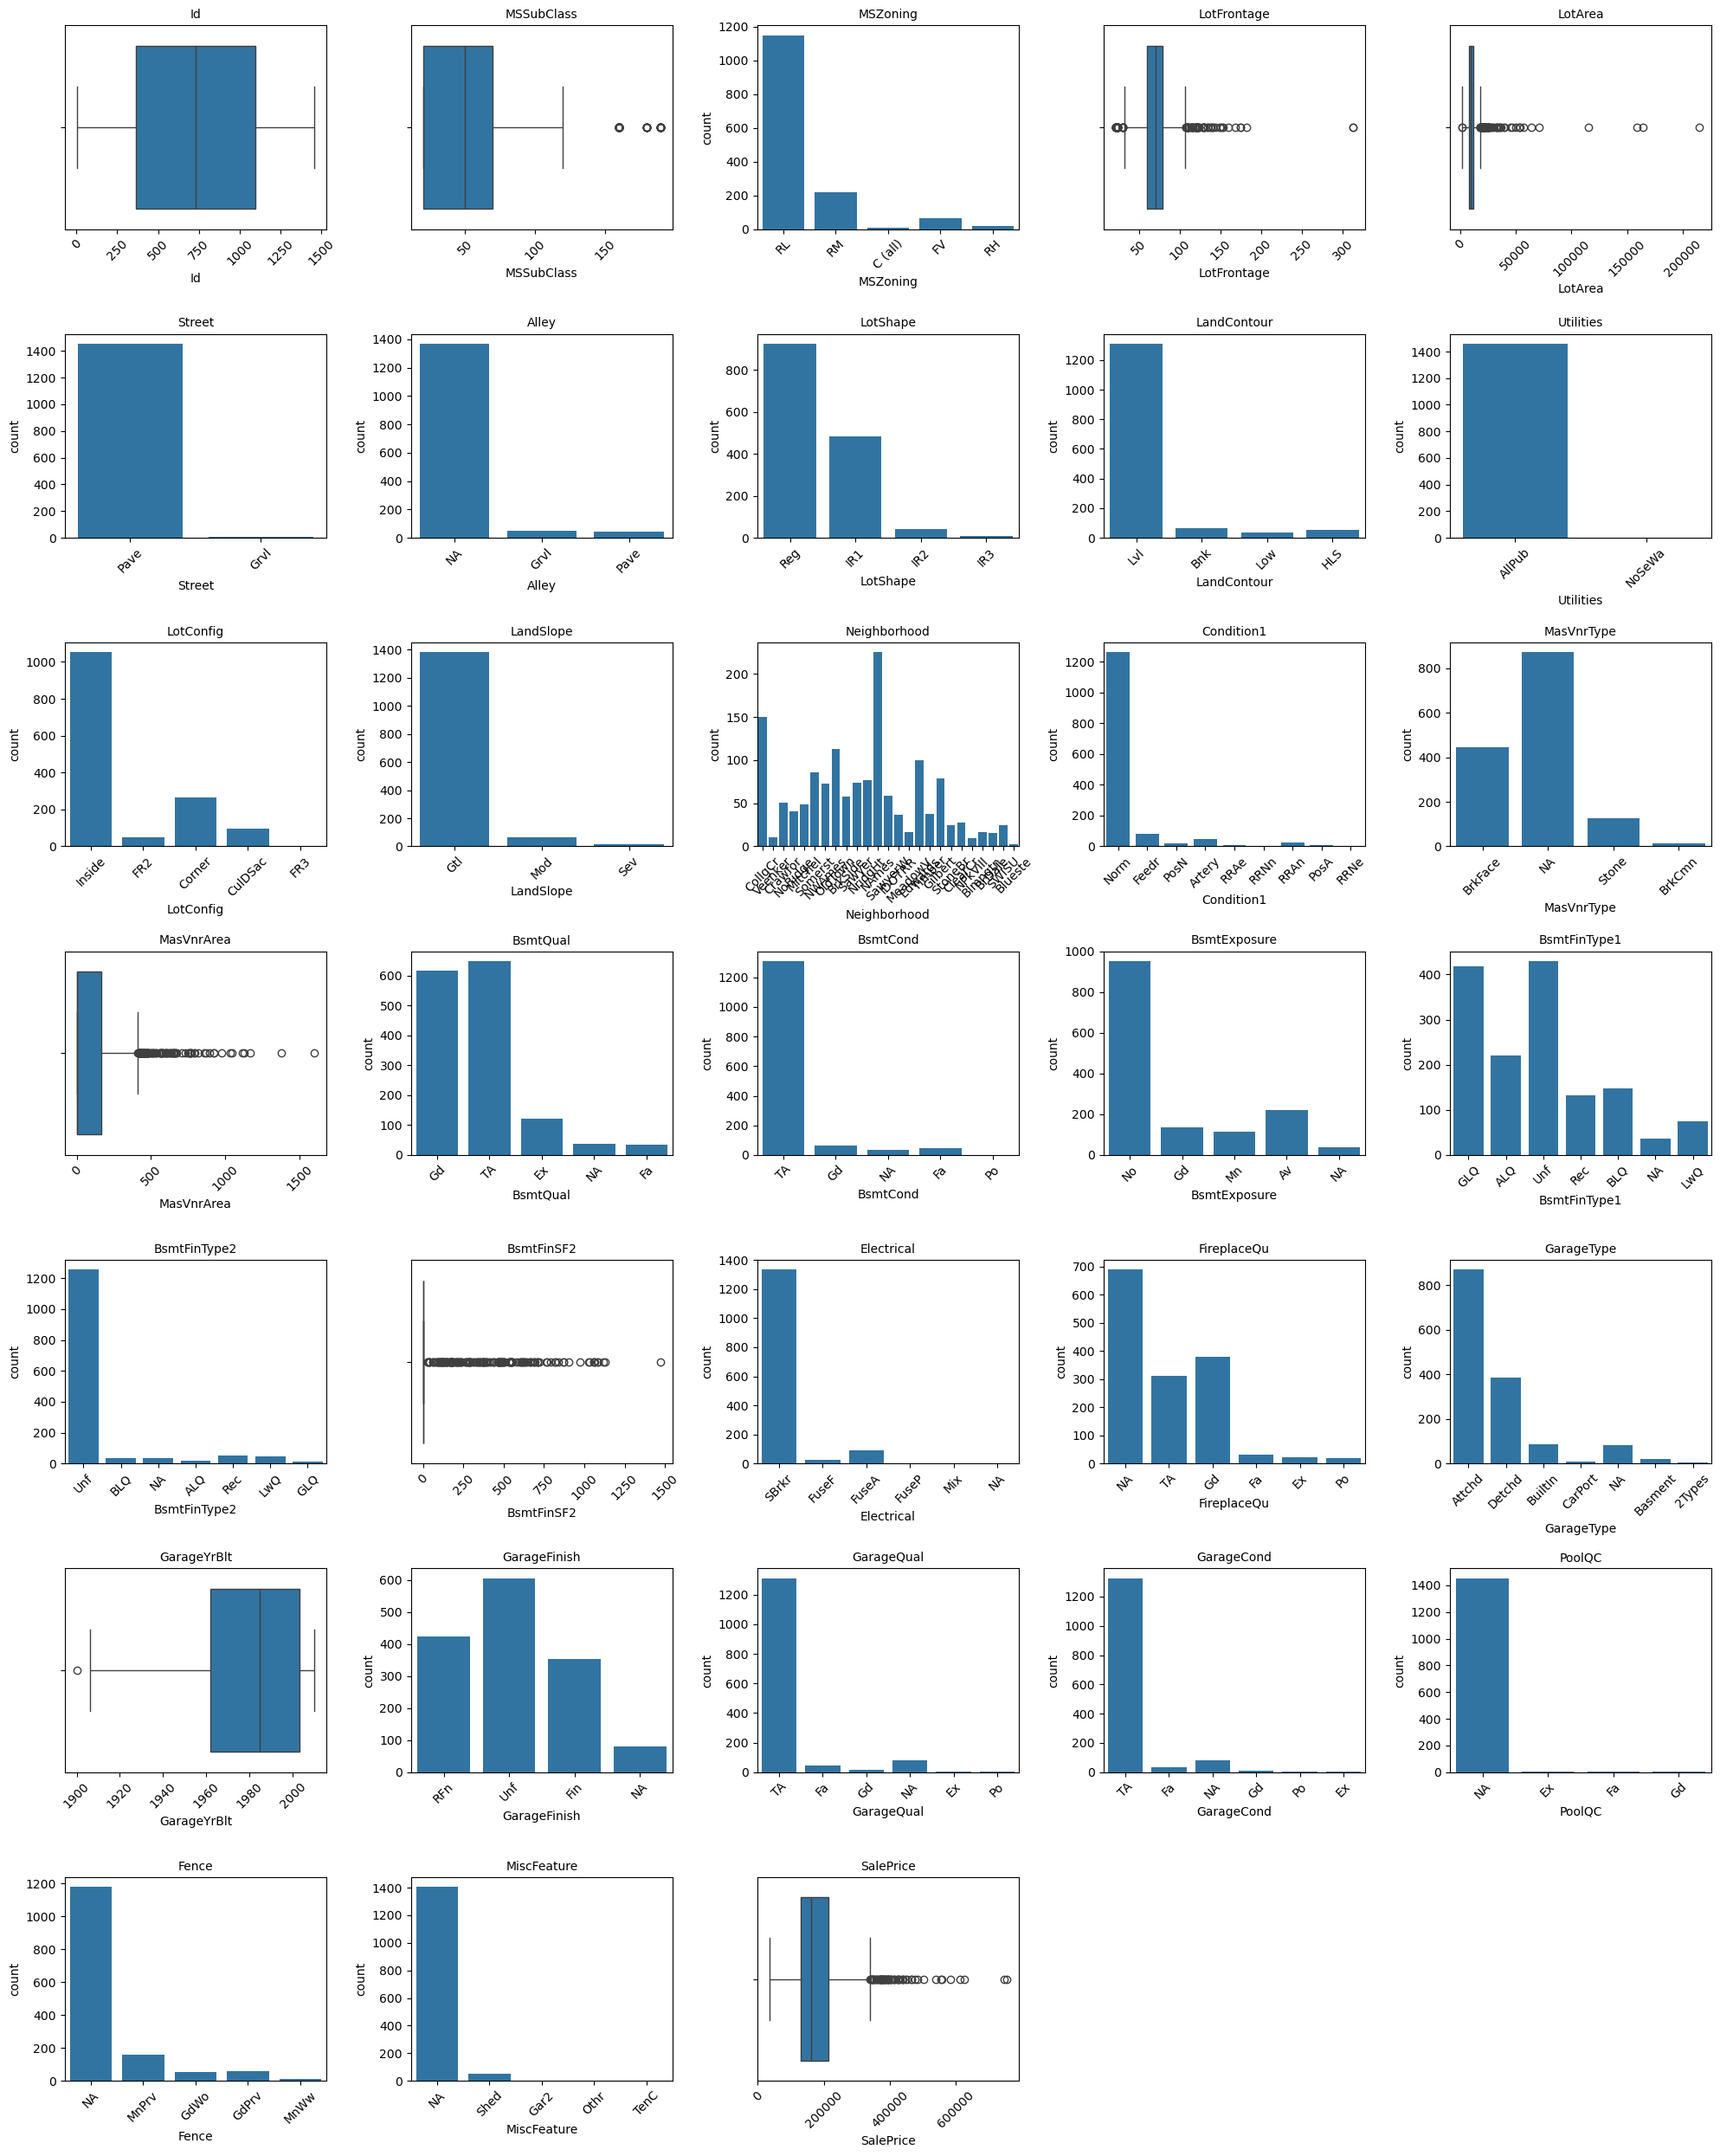

In [103]:
## showing the outlayer


colm = ["Id","MSSubClass","MSZoning","LotFrontage","LotArea","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1",
        "MasVnrType","MasVnrArea","BsmtQual","BsmtCond",	"BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtFinSF2","Electrical","FireplaceQu","GarageType",
        "GarageYrBlt","GarageFinish",	"GarageQual","GarageCond","PoolQC","Fence","MiscFeature","SalePrice"]



plt.figure(figsize=(20, 25))  # Adjust figure size for better readability

# Dynamically calculate rows and columns for the grid
n_cols = 5
n_rows = (len(colm) + n_cols - 1) // n_cols  # Calculate rows needed

for i, col in enumerate(colm, start=1):
    plt.subplot(n_rows, n_cols, i)  # Dynamically adjust grid size
    if df[col].dtype in ['float64', 'int64']:  # For numerical data, use boxplot
        sns.boxplot(data=df, x=col)
    else:  # For categorical data, use countplot
        sns.countplot(data=df, x=col)
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Prevent subplot overlap
plt.show()

In [104]:
## handel the outlayer

colm = ["Id", "MSSubClass", "MSZoning", "LotFrontage", "LotArea", "Street", "Alley", "LotShape", "LandContour", "Utilities",
        "LotConfig", "LandSlope", "Neighborhood", "Condition1", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond",
        "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtFinSF2", "Electrical", "FireplaceQu", "GarageType",
        "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature", "SalePrice"]

# Iterate over columns and clip outliers only for numeric data
for col in colm:
    if df[col].dtype in ['float64', 'int64']:  # Check if the column is numeric
        q1 = df[col].quantile(0.25)  # Calculate the first quartile
        q3 = df[col].quantile(0.75)  # Calculate the third quartile
        IQR = q3 - q1  # Calculate the Interquartile Range (IQR)

        lb = q1 - IQR * 1.5  # Calculate the lower bound
        up = q3 + IQR * 1.5  # Calculate the upper bound

        df[col] = df[col].clip(lower=lb, upper=up)  # Clip the outliers within the bounds
    else:
        print(f"Skipping non-numeric column: {col}")

# Display the DataFrame after clipping outliers
print(df.head())



Skipping non-numeric column: MSZoning
Skipping non-numeric column: Street
Skipping non-numeric column: Alley
Skipping non-numeric column: LotShape
Skipping non-numeric column: LandContour
Skipping non-numeric column: Utilities
Skipping non-numeric column: LotConfig
Skipping non-numeric column: LandSlope
Skipping non-numeric column: Neighborhood
Skipping non-numeric column: Condition1
Skipping non-numeric column: MasVnrType
Skipping non-numeric column: BsmtQual
Skipping non-numeric column: BsmtCond
Skipping non-numeric column: BsmtExposure
Skipping non-numeric column: BsmtFinType1
Skipping non-numeric column: BsmtFinType2
Skipping non-numeric column: Electrical
Skipping non-numeric column: FireplaceQu
Skipping non-numeric column: GarageType
Skipping non-numeric column: GarageFinish
Skipping non-numeric column: GarageQual
Skipping non-numeric column: GarageCond
Skipping non-numeric column: PoolQC
Skipping non-numeric column: Fence
Skipping non-numeric column: MiscFeature
   Id  MSSubClas

Skipping non-numeric column: MSZoning
Skipping non-numeric column: Street
Skipping non-numeric column: Alley
Skipping non-numeric column: LotShape
Skipping non-numeric column: LandContour
Skipping non-numeric column: Utilities
Skipping non-numeric column: LotConfig
Skipping non-numeric column: LandSlope
Skipping non-numeric column: Neighborhood
Skipping non-numeric column: Condition1
Skipping non-numeric column: MasVnrType
Skipping non-numeric column: BsmtQual
Skipping non-numeric column: BsmtCond
Skipping non-numeric column: BsmtExposure
Skipping non-numeric column: BsmtFinType1
Skipping non-numeric column: BsmtFinType2
Skipping non-numeric column: Electrical
Skipping non-numeric column: FireplaceQu
Skipping non-numeric column: GarageType
Skipping non-numeric column: GarageFinish
Skipping non-numeric column: GarageQual
Skipping non-numeric column: GarageCond
Skipping non-numeric column: PoolQC
Skipping non-numeric column: Fence
Skipping non-numeric column: MiscFeature


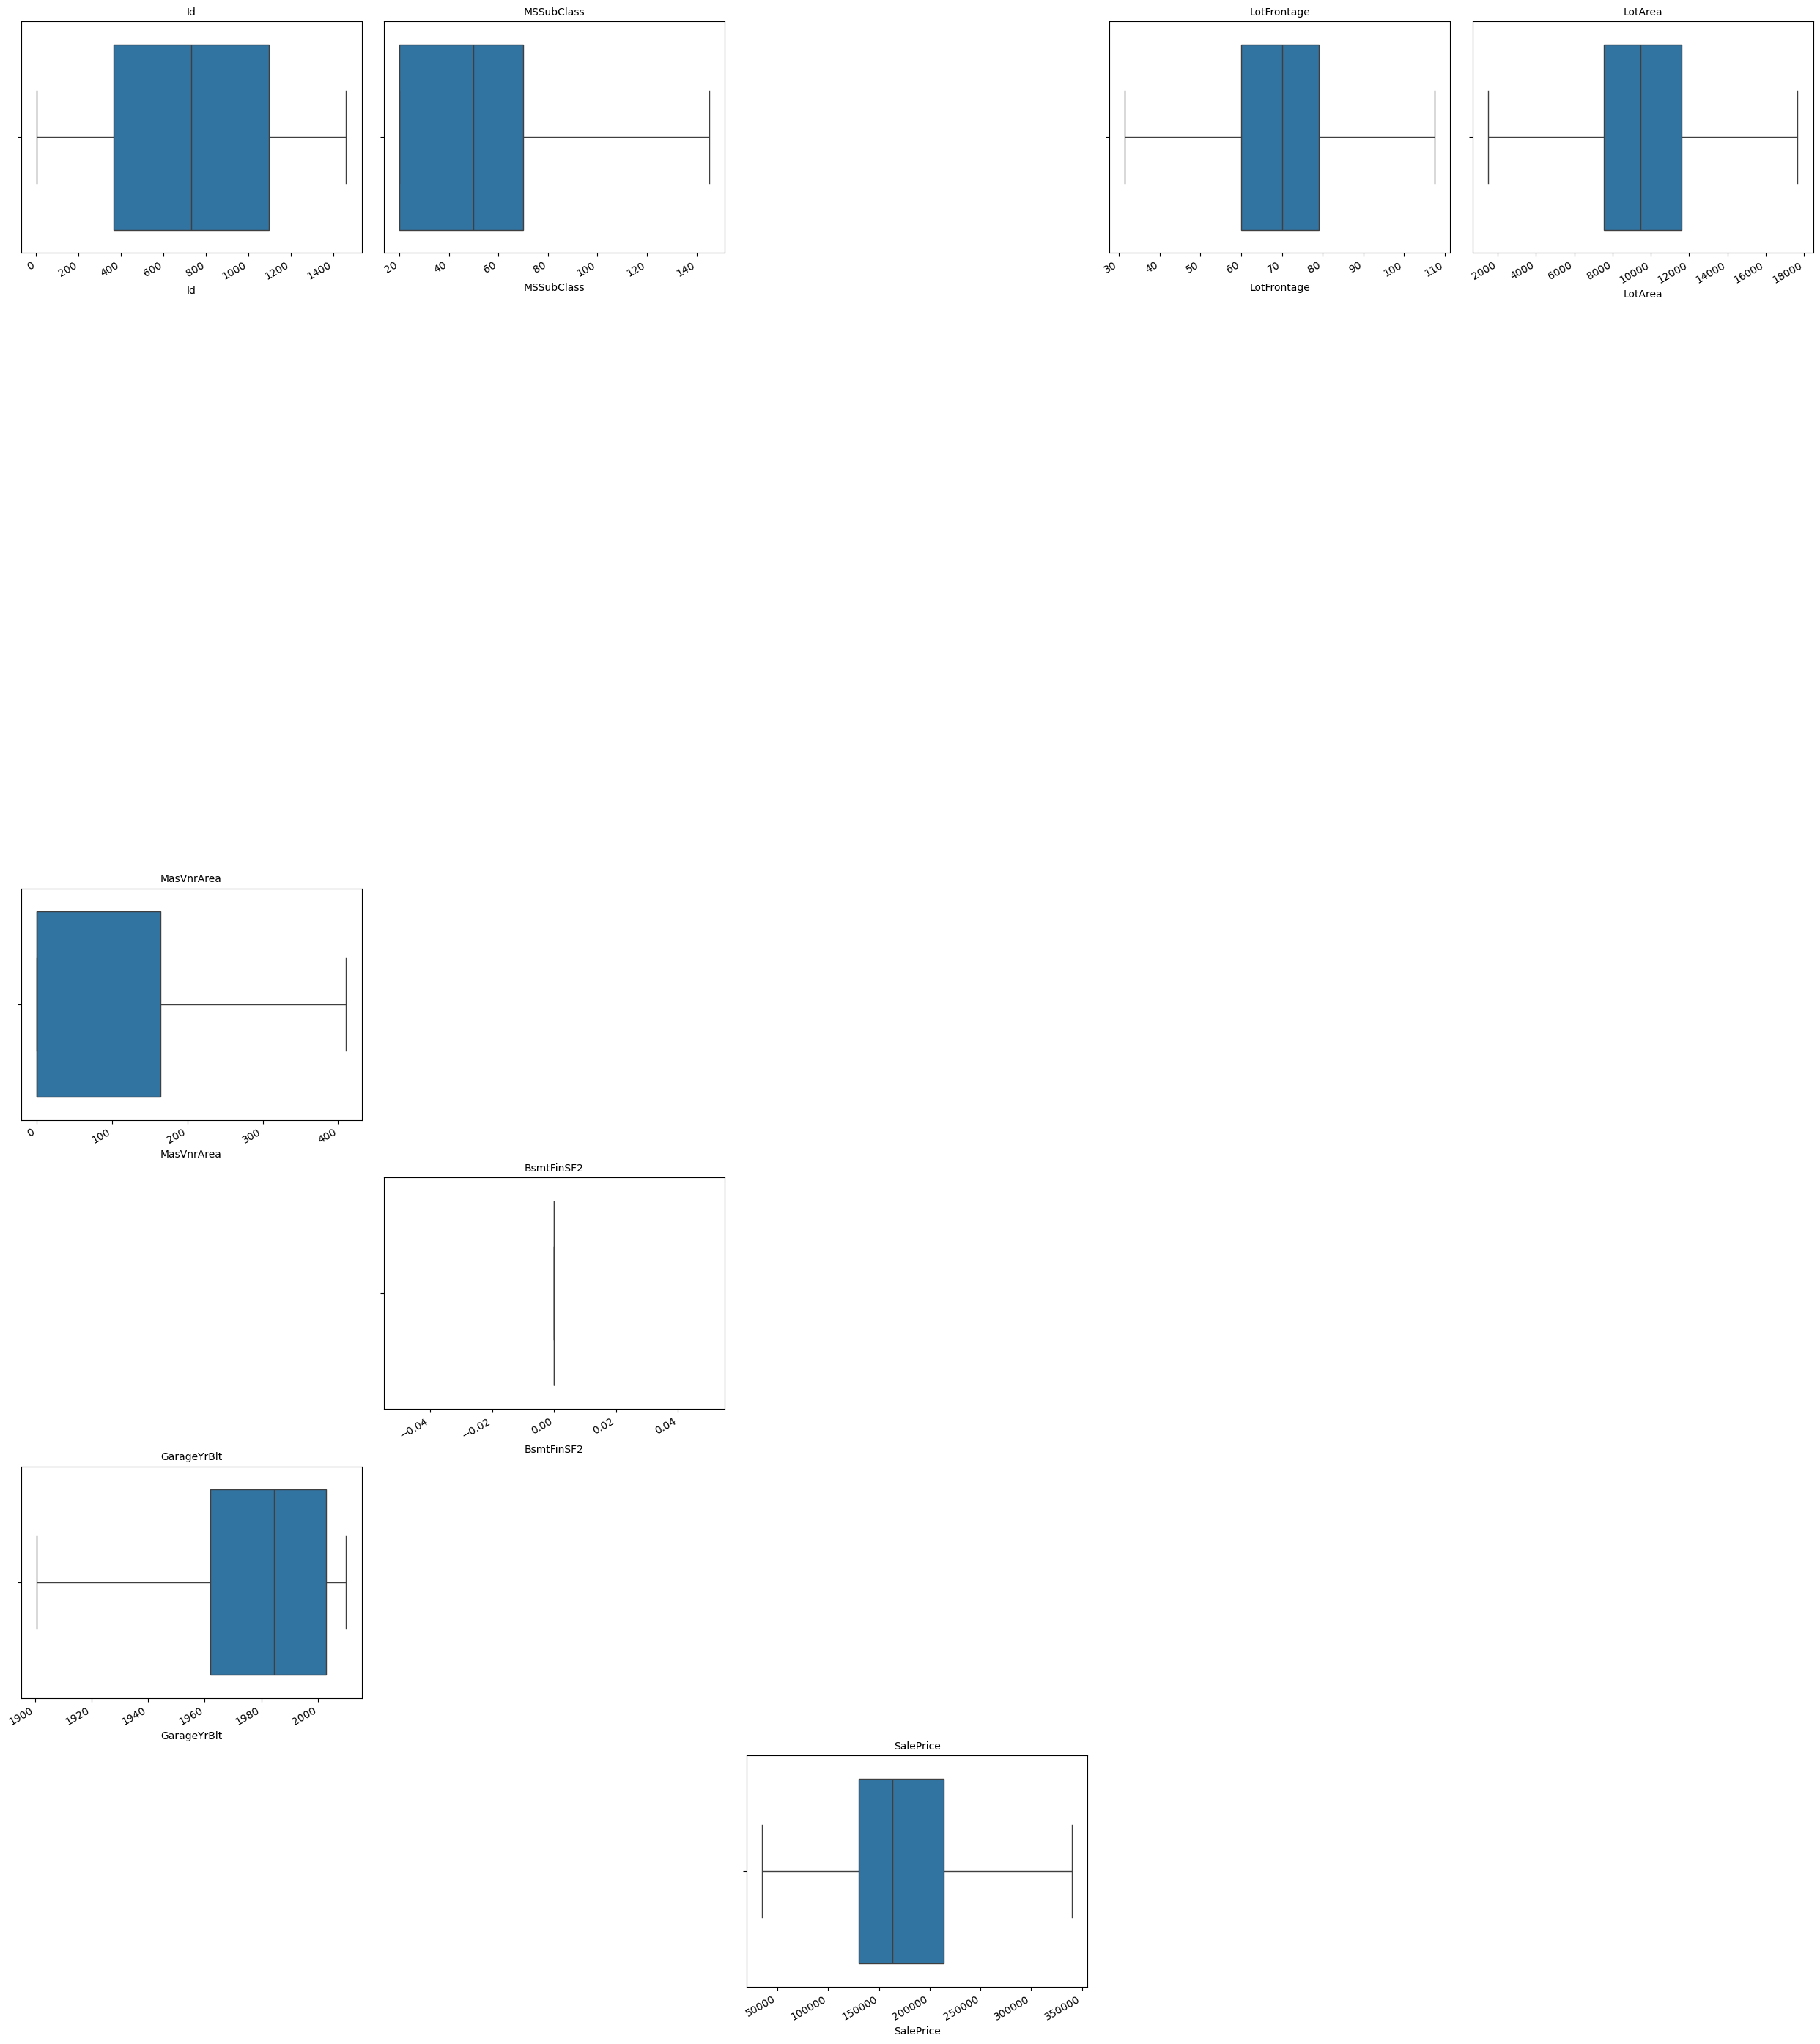

In [105]:
n_cols = 5  # Number of subplots per row
n_rows = (len(colm) + n_cols - 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size for better readability

for i, col in enumerate(colm, start=1):
    if df[col].dtype in ['float64', 'int64']:  # Ensure the column is numeric
        plt.subplot(n_rows, n_cols, i)  # Dynamically adjust subplot grid size
        sns.boxplot(data=df, x=col)
        plt.title(col, fontsize=10)
        plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
    else:
        print(f"Skipping non-numeric column: {col}")

plt.tight_layout()  # Prevent subplot overlap
plt.show()

In [112]:
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# import numpy as np

# # Separate nominal and ordinal columns
# nominal_columns = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',
#                    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
#                    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
#                    'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating',
#                    'CentralAir', 'Electrical', 'Functional', 'GarageType',
#                    'PavedDrive', 'SaleType', 'SaleCondition', 'MiscFeature']

# ordinal_columns = {
#     'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
#     'LandSlope': ['Sev', 'Mod', 'Gtl'],
#     'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
#     'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'BsmtQual': ['Fa', 'TA', 'Gd', 'Ex'],
#     'BsmtCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
#     'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
#     'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
#     'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'KitchenQual': ['Fa', 'TA', 'Gd', 'Ex'],
#     'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'GarageFinish': ['Unf', 'RFn', 'Fin'],
#     'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'PoolQC': ['Fa', 'TA', 'Gd', 'Ex'],
#     'Fence': ['MnWw', 'GdWo', 'MnPrv', 'GdPrv']
# }

# # Handle missing values using imputation
# nominal_imputer = SimpleImputer(strategy='most_frequent')  # Replace missing values with the most frequent category
# ordinal_imputer = SimpleImputer(strategy='most_frequent')

# # Create ColumnTransformer
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('nominal', OneHotEncoder(handle_unknown='ignore', drop='first'), nominal_columns),
#         ('ordinal', OrdinalEncoder(categories=[ordinal_columns[col] for col in ordinal_columns.keys()],
#                                    handle_unknown='use_encoded_value',
#                                    unknown_value=-1), list(ordinal_columns.keys()))
#     ],
#     remainder='passthrough'  # Keep other numerical columns unchanged
# )

# # # Apply imputers first to handle missing values
# # df[nominal_columns] = nominal_imputer.fit_transform(df[nominal_columns])
# # df[list(ordinal_columns.keys())] = ordinal_imputer.fit_transform(df[list(ordinal_columns.keys())])

# # Fit and transform the data
# df_encoded = column_transformer.fit_transform(df)

# # Convert to DataFrame (optional)



In [ ]:
# transformed_columns = transformer.get_feature_names_out()

# # Convert to DataFrame
# # df_encod = pd.DataFrame(col_transformed, columns=transformed_columns, index=df_encod.index)
# ohe = transformer.named_transformers_['Tnf1']
# ohe_feature_names = ohe.get_feature_names_out(input_features=obj_feature)

# # Combine transformed and remainder columns
# remainder_columns = [col for col in df.columns if col not in obj_feature]
# final_columns = list(ohe_feature_names) + remainder_columns

# # Create a new DataFrame with preserved column names
# df_transformed = pd.DataFrame(col_transformed, columns=final_columns)

In [134]:
# df_encoded.head(7)

In [114]:
df.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115.0,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000.0


Total object type feature: 43
Feature: 
  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [116]:
df_encod= df.copy()
# df_mvi.to_csv("Clean_data_house_price(80_feature).csv")
obj_feature=df_encod.select_dtypes(include="object").columns.tolist()

print("Total object type feature:",len(obj_feature))

print("Feature: \n ",obj_feature)

Total object type feature: 43
Feature: 
  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ("Tnf1",OneHotEncoder(drop='first',sparse_output=False),obj_feature)
],remainder='passthrough')

In [118]:
col_transformed = transformer.fit_transform(df_encod)

In [119]:
transformed_columns = transformer.get_feature_names_out()

# Convert to DataFrame
# df_encod = pd.DataFrame(col_transformed, columns=transformed_columns, index=df_encod.index)
ohe = transformer.named_transformers_['Tnf1']
ohe_feature_names = ohe.get_feature_names_out(input_features=obj_feature)

# Combine transformed and remainder columns
remainder_columns = [col for col in df.columns if col not in obj_feature]
final_columns = list(ohe_feature_names) + remainder_columns

# Create a new DataFrame with preserved column names
df_transformed = pd.DataFrame(col_transformed, columns=final_columns)

In [120]:
print("SHape of df before encoding:",df_encod.shape)

# df_encod = pd.get_dummies(df_encod, columns=obj_feature, prefix=obj_feature, drop_first=True)


print("SHape of df After encoding:",df_transformed.shape)

SHape of df before encoding: (1460, 81)
SHape of df After encoding: (1460, 262)


In [121]:
X=df_transformed.drop("SalePrice",axis=1)
y = df_transformed["SalePrice"]


print("Shape of X_train: ",X.shape)
print("Shape of y_train: ",y.shape)

Shape of X_train:  (1460, 261)
Shape of y_train:  (1460,)


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
sc = StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [124]:
from sklearn import linear_model

In [125]:
from sklearn.metrics import r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    score = r2_score(y_train, y_train_pred)
    return score


In [126]:
reg = linear_model.Ridge(alpha=0.8)
test_model(reg)

0.9416363440168267

In [127]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.498e+11, tolerance: 5.158e+08
  model = cd_fast.enet_coordinate_descent(


0.9418947350200142

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
np.mean(cross_val_score(reg,X_train,y_train,scoring='r2',cv=10))

0.6700002624354696

In [130]:
from sklearn.preprocessing import PowerTransformer
pt1 = PowerTransformer(standardize=False)

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

In [131]:
np.mean(cross_val_score(reg,X_train_transformed2,y_train,scoring='r2',cv=10))

0.812159298778413

In [132]:
from sklearn.ensemble import RandomForestRegressor

rfr1 = RandomForestRegressor(random_state=101)
rfr1.fit(X_train_transformed2, y_train)

y_pred = rfr1.predict(X_test_transformed2)
print(r2_score(y_test, y_pred))

0.9135561169836242


In [133]:
np.mean(cross_val_score(rfr1,X_train,y_train,scoring='r2',cv=10))

0.8786606060733501